MONTE CARLO

In [428]:
# USA DADOS DO PASSADO PARA CRIAR SIMULAÇOES DE VARIOS CENARIOS (CRIA O PIOR E O MELHOR CENARIO PARA A EMPRESA SE PREPARAR)
# Preço de hoje = preço de ontem * e^r. 
# r é o retorno logaritmo da acao (preço hoje / preco ontem)
# Movimento Browniano modela r:
   # Drift: direcao que as taxas de retorno tiveram no passado > drift = media - 1/2 * desvio pdrao ^2
   # volatilidade: variavel aleatoria > volatilidade = desvio padrao * Z[Rand(0;1)]

In [429]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

In [430]:
dataset = pd.read_csv('E:\\python\\nv\\python_basico.py\\CURSO PYTHON FINANÇAS\\PARTE 1 - DATA SCIENCE\\acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,0.217754,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,0.221847,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,0.218924,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,0.226231,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,0.224477,10.968824,48.509998
...,...,...,...,...,...,...,...
2287,2024-04-24,1.25,2.000000,38.230000,1.430000,28.110001,120.970001
2288,2024-04-25,1.18,2.010000,38.669998,1.390000,27.959999,120.910004
2289,2024-04-26,1.22,2.010000,39.220001,1.430000,28.080000,122.830002
2290,2024-04-29,1.31,2.080000,39.360001,1.450000,27.950001,123.769997


In [431]:
figura = px.line(title = 'Histórico do preço das ações')
for i in dataset.columns[1:]:
  figura.add_scatter(x = dataset['Date'], y = dataset[i], name = i)
figura.show()

In [432]:
dataset = pd.DataFrame(dataset['BOVA'])
dataset

,BOVA
0,47.259998
1,46.320000
2,46.580002
3,48.150002
4,48.509998
...,...
2287,120.970001
2288,120.910004
2289,122.830002
2290,123.769997


In [433]:
dataset_normalizado = dataset.copy()
for i in dataset:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]
dataset_normalizado

,BOVA
0,1.000000
1,0.980110
2,0.985612
3,1.018832
4,1.026449
...,...
2287,2.559670
2288,2.558401
2289,2.599027
2290,2.618917


In [434]:
# É a mesma coisa de usar shift
dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
dataset_taxa_retorno

,BOVA
0,NaN
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
2287,-0.003631
2288,-0.000496
2289,0.015755
2290,0.007624


In [435]:
dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno.head()

,BOVA
0,0.000000
1,-0.020090
2,0.005597
3,0.033150
4,0.007449


CÁLCULO DO DRIFT

In [436]:
media = dataset_taxa_retorno.mean()
media

BOVA    0.000415
dtype: float64

In [437]:
variancia = dataset_taxa_retorno.var()
variancia

BOVA    0.000251
dtype: float64

In [438]:
drift = media - (0.5 * variancia)

CÁLCULO DOS RETORNOS DIÁRIOS

In [439]:
dias_frente = 10
simulacoes = 10 # Quantas curvas serão criadas

In [440]:
desvio_padrao = dataset_taxa_retorno.std()
desvio_padrao

BOVA    0.015847
dtype: float64

In [441]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

In [442]:
# Foram criadas 10 simulacoes de 50 dados.
Z.shape

(10, 10)

<Axes: ylabel='Count'>

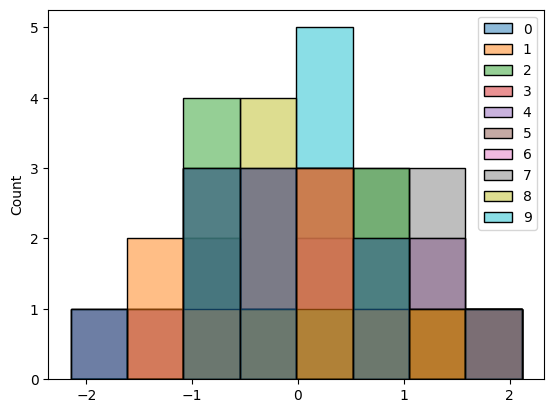

In [443]:
# São 10 hitogramas, um para cada simulacao
sns.histplot(Z)

In [444]:
Z

array([[-2.51260842e-01,  1.57184262e+00, -6.31462298e-02,
        -3.17791397e-01,  4.26531360e-01, -7.23199677e-02,
        -3.07512224e-02,  1.45013259e+00, -1.34447382e-01,
         2.04336556e-01],
       [-6.12427708e-01,  1.43341668e-01, -8.19363738e-01,
        -6.60440909e-01,  2.89296358e-01,  1.25495149e-01,
        -1.16686334e+00,  1.16985055e+00, -4.18413099e-01,
         1.36291395e-01],
       [-2.31993058e-01,  1.69608573e+00,  4.17102943e-01,
        -5.68113822e-01, -2.34396154e-01, -1.96915425e+00,
        -6.97808111e-04, -8.69869238e-01,  4.35150743e-01,
        -1.02978518e+00],
       [ 5.38624577e-01, -1.56083322e+00, -8.37793632e-01,
         8.27165646e-01, -1.40192285e+00, -1.12733319e+00,
         8.89498435e-01,  1.17182192e+00,  1.81330806e+00,
         4.21029266e-01],
       [-1.06548078e+00, -6.55280559e-01, -9.31443922e-01,
        -5.25845422e-01, -7.71084260e-01,  1.62671057e+00,
        -8.30529903e-01,  9.06979096e-02,  4.62084845e-01,
        -2.

In [445]:
desvio_padrao.values

array([0.01584654])

In [446]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

In [447]:
retornos_diarios

array([[0.9963149 , 1.02551814, 0.99928931, 0.99526506, 1.00707366,
        0.99914406, 0.99980243, 1.02354214, 0.99816088, 1.00353397],
       [0.99062903, 1.00256446, 0.98738586, 0.98987561, 1.00488596,
        1.00228097, 0.9819636 , 1.01900616, 0.99367937, 1.00245246],
       [0.99661915, 1.02753919, 1.00692321, 0.99132492, 0.9965812 ,
        0.96955839, 1.00027869, 0.98659594, 1.00721122, 0.98409895],
       [1.0088641 , 0.97585224, 0.98709754, 1.01348758, 0.9783127 ,
        0.98257891, 1.01448915, 1.01903799, 1.02944969, 1.00698586],
       [0.98354245, 0.98995655, 0.98563374, 0.99198914, 0.98814156,
        1.02641018, 0.98721116, 1.00172845, 1.00764121, 0.9963061 ],
       [1.02582913, 1.0073379 , 1.01562008, 1.01783187, 1.00262126,
        1.0044762 , 0.96982294, 1.03435692, 1.02082956, 1.00550464],
       [0.99876547, 0.98273019, 1.02120773, 0.99182439, 0.98737055,
        1.00589427, 0.98762596, 1.00262334, 1.02082751, 1.00549912],
       [0.96681103, 0.99721249, 1.0118083

In [448]:
previsoes = np.zeros_like(retornos_diarios)

In [449]:
previsoes.shape

(10, 10)

In [450]:
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [451]:
previsoes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [452]:
dataset.iloc[-1]

BOVA    122.419998
Name: 2291, dtype: float64

In [453]:
# As simulacoes iniciam na ultima data da base de dados
previsoes[0] = dataset.iloc[-1]
previsoes

array([[122.41999817, 122.41999817, 122.41999817, 122.41999817,
        122.41999817, 122.41999817, 122.41999817, 122.41999817,
        122.41999817, 122.41999817],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [454]:
for dia in range(1, dias_frente):
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

In [455]:
previsoes.shape

(10, 10)

In [456]:
previsoes

array([[122.41999817, 122.41999817, 122.41999817, 122.41999817,
        122.41999817, 122.41999817, 122.41999817, 122.41999817,
        122.41999817, 122.41999817],
       [121.27280433, 122.73393983, 120.87577535, 121.18056982,
        123.01813692, 122.69923489, 120.21198194, 124.74673224,
        121.64622658, 122.72022846],
       [120.86279929, 126.11393317, 121.71262332, 120.12931846,
        122.59756247, 118.96407277, 120.24548407, 123.074619  ,
        122.52344466, 120.76884836],
       [121.93413981, 123.06856375, 120.14223074, 121.74957172,
        119.93875297, 116.89158885, 121.98773916, 125.41771281,
        126.131722  , 121.61252238],
       [119.92740298, 121.83253136, 118.41623599, 120.7742527 ,
        118.51646679, 119.97871667, 120.42765794, 125.63449126,
        127.09552036, 121.16329773],
       [123.02502306, 122.72652654, 120.26590661, 122.92788369,
        118.82712905, 120.5157652 , 116.79350528, 129.95090486,
        129.74286383, 121.83025809],
       [12

GRÁFICO DAS PREVISOES

In [457]:
len(previsoes)

10

In [458]:
# É PRECISO USAR A MATRIZ TRANSPOSTA PARA MELHORAR A SIMULACAO
previsoes.T.shape, previsoes.shape

((10, 10), (10, 10))

In [459]:
figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)
figura.show()

COMPARANDO AS PREVISOES COM OS PRECOS REAIS

In [460]:
import yfinance as yf

In [461]:
dataset_bova = gol_df = yf.download("BOVA11.SA", start='2024-04-30')['Close']
dataset_bova

[*********************100%%**********************]  1 of 1 completed


Date
2024-04-30    122.379997
2024-05-02    123.349998
2024-05-03    124.900002
Name: Close, dtype: float64

In [462]:
dataset_bova.to_csv('dataset_bova.csv')

In [463]:
dataset_bova = pd.read_csv('dataset_bova.csv')
dataset_bova

,Date,Close
0,2024-04-30,122.379997
1,2024-05-02,123.349998
2,2024-05-03,124.900002


In [464]:
len(dataset_bova)

3

In [465]:
simulacao1 = previsoes.T[0][0:len(dataset_bova)]
simulacao1

array([122.41999817, 121.27280433, 120.86279929])

In [466]:
abs(dataset_bova['Close'] - simulacao1)

0    0.040001
1    2.077194
2    4.037202
Name: Close, dtype: float64

In [467]:
# Erro absoluto medio
np.sum(abs(dataset_bova['Close'] - simulacao1)) / len(simulacao1)

2.0514657640294396

In [468]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataset_bova['Close'], simulacao1)

2.0514657640294396

In [469]:
erros = []
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_bova)]
  erros.append(mean_absolute_error(dataset_bova['Close'], simulacao))

In [470]:
erros

[2.0514657640294396,
 0.6233304005943504,
 1.9005340828947415,
 2.326704210279601,
 0.8914338425241084,
 2.2088977544022206,
 2.610844968125207,
 1.0873724034366983,
 1.3734432233036813,
 1.6003080336520696]

In [471]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = dataset_bova['Close'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[9], name = 'Pior simulação')
figura.add_scatter(y = previsoes.T[1], name = 'Melhor simulação')

EXERCÍCIO

In [472]:
def monte_carlo_previsao(dataset, acao, dias_frente, simulacoes):
    dataset = pd.DataFrame(dataset[acao])
    dataset_normalizado = dataset.copy()
    for i in dataset:
        dataset_normalizado[i] = dataset[i] / dataset[i][0]

    # É a mesma coisa de usar shift
    dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
    dataset_taxa_retorno.fillna(0, inplace=True)

    media = dataset_taxa_retorno.mean()
    variancia = dataset_taxa_retorno.var()
    drift = media - (0.5 * variancia)

    #dias_frente = 10
    #simulacoes = 10 # Quantas curvas serão criadas
    desvio_padrao = dataset_taxa_retorno.std()
    
    Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

    retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)
    previsoes = np.zeros_like(retornos_diarios)

    # As simulacoes iniciam na ultima data da base de dados
    previsoes[0] = dataset.iloc[-1]

    for dia in range(1, dias_frente):
        previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]


    figura = px.line(title = 'Previsões do preço das ações - ' + acao)
    for i in range(len(previsoes.T)):
        figura.add_scatter(y = previsoes.T[i], name = i)
    figura.show()  

    return previsoes.T
    

In [473]:
dataset = pd.read_csv('E:\\python\\nv\\python_basico.py\\CURSO PYTHON FINANÇAS\\PARTE 1 - DATA SCIENCE\\acoes.csv')
for ativo in dataset.columns[1:]:
    monte_carlo_previsao(dataset, ativo, 50, 15)

In [475]:
dataset = pd.read_csv('E:\\python\\nv\\python_basico.py\\CURSO PYTHON FINANÇAS\\PARTE 1 - DATA SCIENCE\\acoes_ex.csv')
for ativo in dataset.columns[1:]:
    monte_carlo_previsao(dataset, ativo, 50, 100)

C:\Users\tdw07\AppData\Local\Temp\ipykernel_5944\3220033775.py:8: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

